# Least Squares Regression

We're going to tackle one of the most simple and yet powerful tool of Machine Learning, the Least Squares estimator. Given a function in the shape of 

\begin{equation}
\hat y = w^T\Phi\left(x\right) + b \label{linear}
\end{equation}

where $\hat y, b \in \mathbb{R}$ and $\Phi$ is a mapping from our input space to a given feature space such that $\Phi: \mathbb{R}^m \to \mathbb{R}^n$, we want to estimate the optimal $w$ which minimizes

\begin{equation}
e = \sum^{N}_{i = 1} \left(y - \hat y\right)^2 \label{sse}
\end{equation}

## Problem: fit the a straight line through a number of points

This is the most basic and common use case, so we need to see it in action. Let's generate a number of random points between $\left[0, 1\right]$ according to the following model

\begin{equation}
y = 2x + 1 + e
\end{equation}

where $e \sim \mathcal{N} \left(0, 0.2^2\right)$. In this case $w \in \mathbb{R}$ and is equal to $2$, $x \in \mathcal{U} \left(0, 1\right)$ and $b=1$


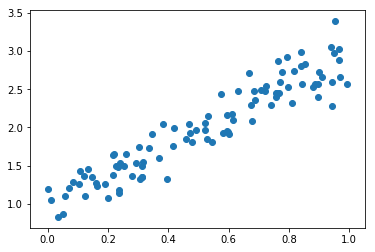

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


n = 100
x = np.random.uniform(size=n)
e = np.random.normal(scale=0.2, size=n)
y = 2*x + 1 + e

#
plt.scatter(x=x, y=y)
plt.show()


### How to find the best $w$ and $b$?

Let's derive this one time so that you understand the most basic concepts of all these algorithms. We are interested in finding the weight vector $w$ which minimizes the sum of the square error

\begin{equation}
\underset{w}{\operatorname{argmin}} e = \sum^{N}_{i = 1} \left(y_i - w^T \Phi(x_i) - b \right)^2 
\end{equation}

We can augment $w$ such that $w_0 = b$ and $w \in \mathbb{R}^{n+1}$ and rerite the expression above as

\begin{equation}
\underset{w}{\operatorname{argmin}} e = \sum^{N}_{i = 1} \left(y_i - w^T \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \right)^2 
\end{equation}


Since the equation is linear, it has a closed-form solution. Let's start by finding the $w$ which gives as a null gradient. We're also going to make use of an important property of matrix derivatives, in this case applied to vectors

\begin{equation}
\frac{d x^Ta}{dx} =  a
\end{equation}

for $a, x \in \mathbb{R}^n$.

\begin{eqnarray}
\frac{d}{dw} \sum^{N}_{i = 1} \left(y_i - w^T \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \right)^2  & = & 0 \\
\sum^{N}_{i = 1} \frac{d}{dw} \left(y_i - w^T \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \right)^2 & = & 0 \\
\sum^{N}_{i = 1} -2 \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \left(y_i - w^T \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \right) & = & 0 \\
\sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \left(\left[\begin{matrix}\Phi(x_i)^T & 1 \end{matrix} \right] w - y_i\right) & = & 0 \\
\sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \left[\begin{matrix}\Phi(x_i)^T & 1 \end{matrix} \right] w & = & \sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] y_i \\
\sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i)\Phi(x_i)^T & \Phi(x_i) \\ \Phi(x_i)^T & 1 \end{matrix} \right] w & = & \sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] y_i \\
 \left[\begin{matrix}\sum^{N}_{i = 1} \Phi(x_i)\Phi(x_i)^T & \sum^{N}_{i = 1} \Phi(x_i) \\ \sum^{N}_{i = 1} \Phi(x_i)^T & N \end{matrix} \right] w & = & \left[\begin{matrix} \sum^{N}_{i = 1}\Phi(x_i) y_i \\ \sum^{N}_{i = 1}y_i \end{matrix} \right]
\end{eqnarray}

resulting of course in

\begin{equation}
 w = \left[\begin{matrix}\sum^{N}_{i = 1} \Phi(x_i)\Phi(x_i)^T & \sum^{N}_{i = 1} \Phi(x_i) \\ \sum^{N}_{i = 1} \Phi(x_i)^T & N \end{matrix} \right]^{-1}\left[\begin{matrix} \sum^{N}_{i = 1}\Phi(x_i) y_i \\ \sum^{N}_{i = 1}y_i \end{matrix} \right]\\
\end{equation}

Let's apply this proof to our case. First we need to figure what is what. We know the data was generated under the following model

\begin{equation}
y = 2x + 1
\end{equation}

plus some added noise. In this case the $\Phi(x) = x$, $w = 2$ and $b = 1$.



In [2]:
X = np.array([[np.dot(x, x), np.sum(x)],[np.sum(x), n]])
Y = np.array([np.dot(x,y), np.sum(y)])
theta = np.linalg.solve(X,Y)
print(theta)

[1.95328232 0.98646063]


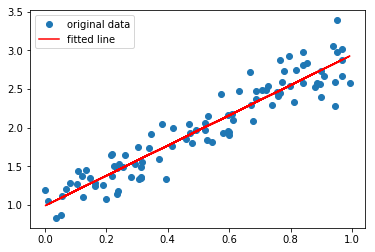

In [3]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, theta[0]*x + theta[1], 'r', label='fitted line')
plt.legend()
plt.show()

Scikit already provides linear regression capabilities among others. So everything we went through could have been replaced by

In [4]:
import sklearn
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1), y)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [1.95328232]
Intercept: 
 0.9864606337778363


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


### Normal Equations

\begin{equation}
 w = \left[\begin{matrix}\sum^{N}_{i = 1} \Phi(x_i)\Phi(x_i)^T & \sum^{N}_{i = 1} \Phi(x_i)^T \\ \sum^{N}_{i = 1} \Phi(x_i) & N \end{matrix} \right]^{-1}\left[\begin{matrix} \sum^{N}_{i = 1}\Phi(x_i) y_i \\ \sum^{N}_{i = 1}y_i \end{matrix} \right]\\
\end{equation}

Can be written in another way commonly know as the **normal equations**. Just like before, consider you have $N$ samples and you stack your features and your target like this

\begin{equation}
X =  \left[\begin{matrix}\Phi(x_1)^T & \dots  & 1 \\
                         \vdots    & \ddots & \vdots \\
                         \Phi(x_N)^T & \dots  & 1 \end{matrix}\right]
\end{equation}

\begin{equation}
\textbf{y} =  \left[\begin{matrix} y_1 \\ \vdots \\ y_N \end{matrix}\right]
\end{equation}


The best $w$ is given by

\begin{equation}
\hat{w} = (X^TX)^{-1} X^T  \textbf{y}
\end{equation}

Let's test it.

In [5]:
X = np.matrix([x, np.ones(len(x))]).T
Y = np.matrix(y).T
print("X shape:\n", X.shape)
print("Y shape:\n", Y.shape)

w = np.linalg.solve(X.T * X, X.T * Y)
print("w:\n", w)

X shape:
 (100, 2)
Y shape:
 (100, 1)
w:
 [[1.95328232]
 [0.98646063]]


**Homework**: Prove it!

## Issues

If you run into troubles or find mistakes, bugs, please open an issue on the [issue tracker](https://github.com/SergioRAgostinho/bootstrap-ml/issues).
